# Value at Risk - Monte Carlo Method

Value at Risk using the Monte Carlo method. Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial.  After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the **Geometric Brownian Motion (GBM)**, which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the **Efficient Market Hypothesis (EMH)**: past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

**The equation for geometric Brownian motion is given by the following equation:**

$ \ ΔS=μΔt+σϵ\sqrtΔt  $


Where S is the stock price, mu is the expected return, sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

**We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price:**

$ \ ΔS=S \cdot (μΔt+σϵ\sqrtΔt) $

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as **"drift"**, which is the average daily return multiplied by the change of time. The second term is known as **"shock"**, for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

In [2]:
import numpy as np
import math
from math import sqrt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from pandas import Series, DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from scipy.stats import norm

# Predicting Stock Prices

## $ \ P_t $ = $ \ P_{t-1} $ $  \cdot $  $  \ e^r $
>  r = log return of share price between yesterday & today = $ \ ln(\frac {P_t}{P_{t-1}}) $

In [3]:
data1 = pd.read_csv('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 12 - Investment Risk/Exercises/MSFT_AAPL_2000_2017.csv', index_col = 'Date', parse_dates = True)

In [4]:
data1.describe()

,MSFT,AAPL
count,4334.000000,4334.000000
mean,26.355501,36.430323
std,11.103531,39.178486
min,12.171559,0.843106
25%,19.205681,3.305432
50%,22.306034,17.989905
75%,27.735392,66.555157
max,64.666435,140.327454


In [5]:
data1.head(2)

,MSFT,AAPL
Date,,
1999-12-31,38.965767,3.303425
2000-01-03,38.903194,3.596616


In [6]:
data1.tail(2)

,MSFT,AAPL
Date,,
2017-03-22,64.316704,140.287766
2017-03-23,64.158463,139.791763


In [7]:
data = data1['AAPL']
data.tail()

Date
2017-03-17    138.869217
2017-03-20    140.327454
2017-03-21    138.720413
2017-03-22    140.287766
2017-03-23    139.791763
Name: AAPL, dtype: float64

In [8]:
lreturns = np.log(data/data.shift(1))
(lreturns.head())*100

Date
1999-12-31         NaN
2000-01-03    8.503359
2000-01-04   -8.807780
2000-01-05    1.452784
2000-01-06   -9.051365
Name: AAPL, dtype: float64

In [9]:
lreturns.tail()

Date
2017-03-17   -0.004988
2017-03-20    0.010446
2017-03-21   -0.011518
2017-03-22    0.011235
2017-03-23   -0.003542
Name: AAPL, dtype: float64

In [10]:
lrets = np.log(1 + data.pct_change())
lrets.tail()

Date
2017-03-17   -0.004988
2017-03-20    0.010446
2017-03-21   -0.011518
2017-03-22    0.011235
2017-03-23   -0.003542
Name: AAPL, dtype: float64

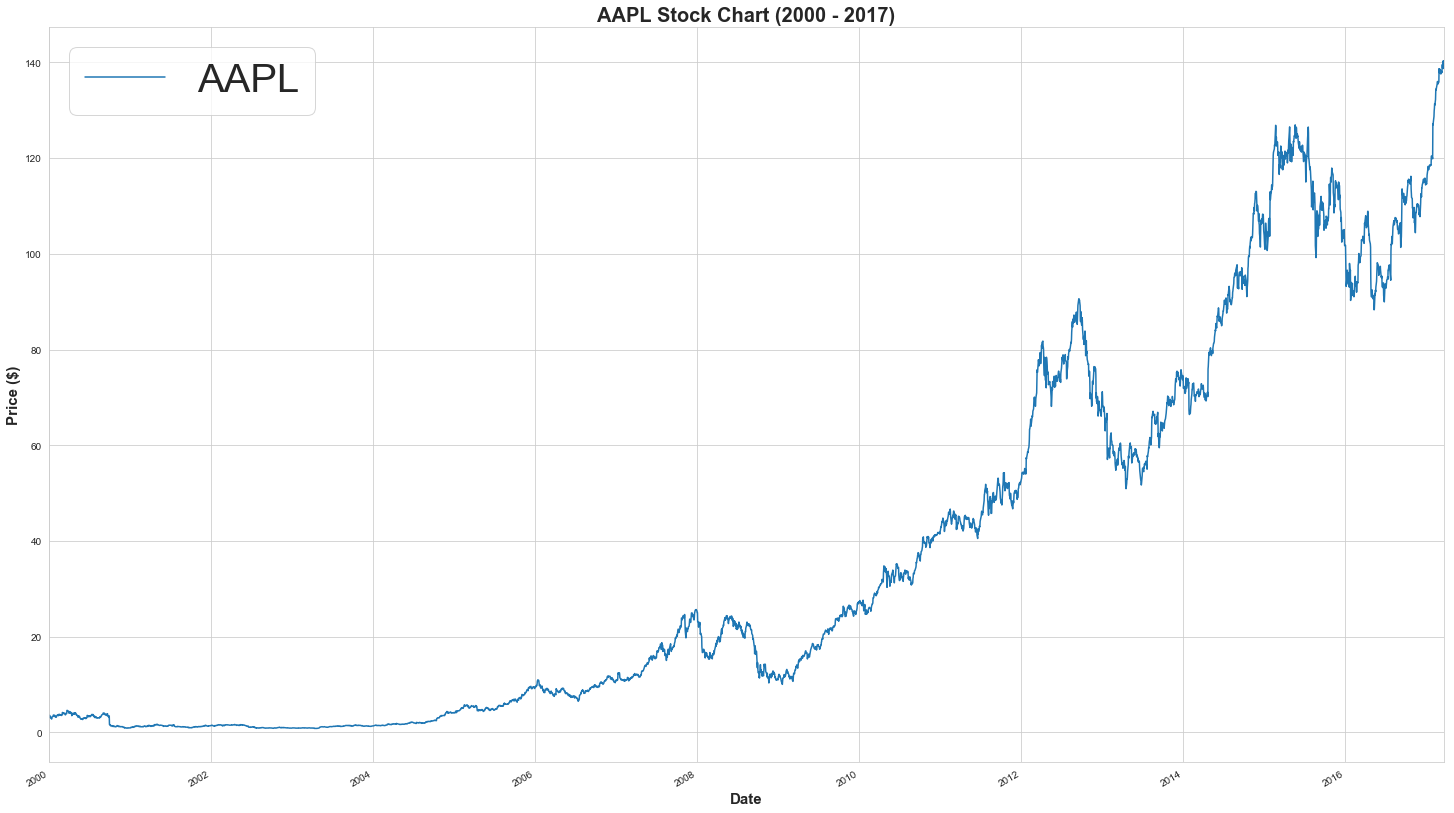

In [11]:
data.plot(figsize = (25,15), legend = True)
plt.title('AAPL Stock Chart (2000 - 2017)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Price ($)', fontsize = 15, weight = 'bold')
plt.legend(fontsize = 40, loc = 2)
plt.margins(x = 0)
plt.show()

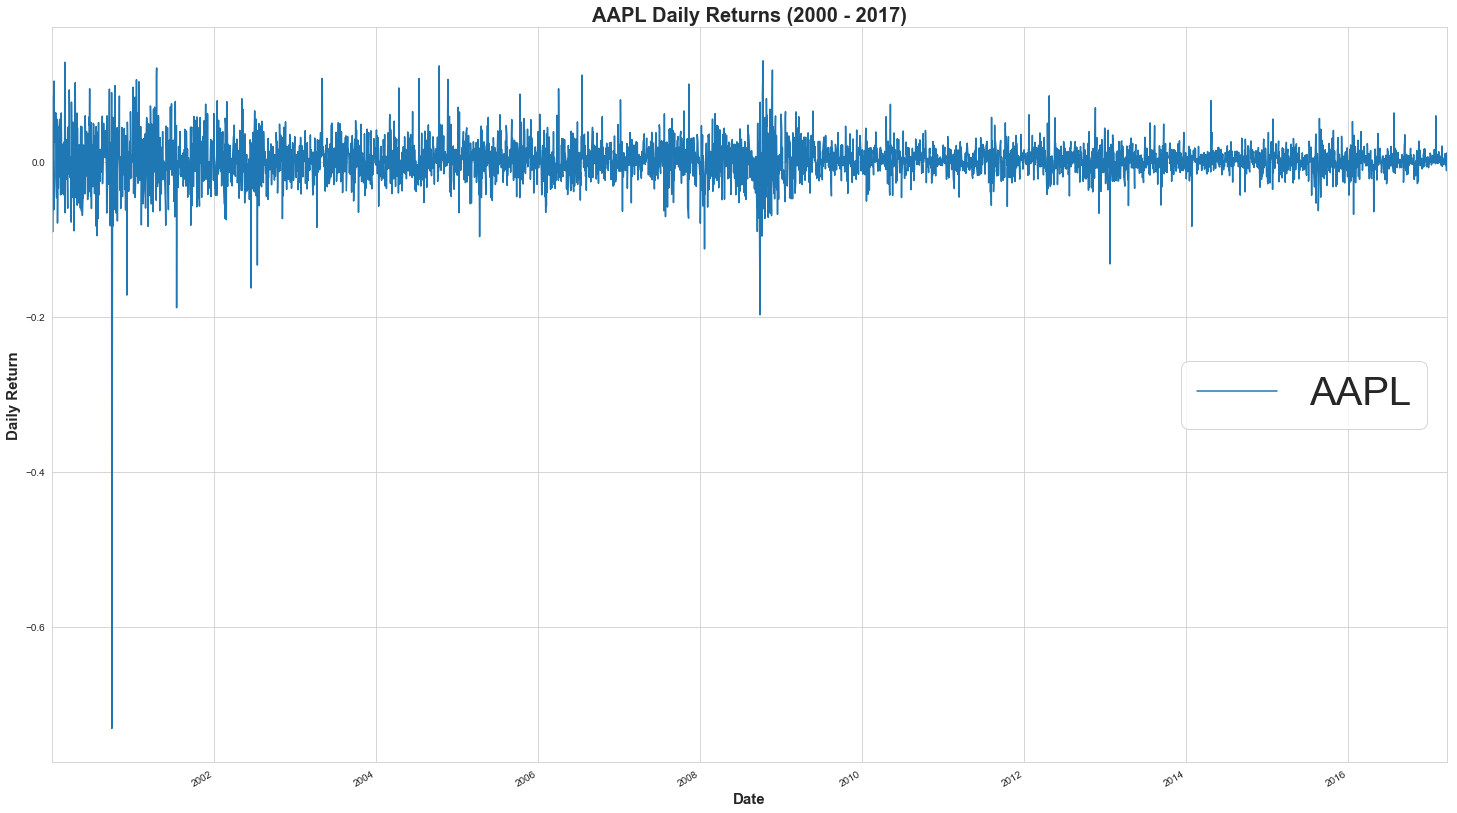

In [12]:
lreturns.plot(figsize = (25,15), legend = True)
plt.title('AAPL Daily Returns (2000 - 2017)', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return', fontsize = 15, weight = 'bold')
plt.legend(fontsize = 40, loc = 5)
plt.margins(x = 0)
plt.show()

In [13]:
mu = lreturns.mean()
mu

0.000864342049190355

In [14]:
var = lreturns.var()
var

0.0007707249967476555

$$ drift = \mu - (\frac{1}{2} \cdot \sigma^2) $$

In [15]:
drift = mu - (0.5*var)                #Predicting daily stock price -> Don't need to annualise
drift

0.0004789795508165272

In [16]:
stdev = lreturns.std()
stdev

0.027761934312069386

In [17]:
type(drift)

float

In [18]:
type(stdev)

float

In [19]:
np.array(drift)                       #Convert drift into an array

array(0.00047898)

In [20]:
norm.ppf(0.95)

1.6448536269514722

In [21]:
x = np.random.rand(10, 2)
x

array([[0.06360472, 0.46940575],
       [0.04656429, 0.31642985],
       [0.80175316, 0.77593945],
       [0.74217003, 0.43252864],
       [0.38825437, 0.11216694],
       [0.17957149, 0.72180451],
       [0.71629611, 0.72245729],
       [0.14846896, 0.91047021],
       [0.56667748, 0.6092206 ],
       [0.98008354, 0.84361008]])

In [22]:
norm.ppf(x)                          #Distance from mean correspondng to each probability

array([[-1.52519915, -0.07676373],
       [-1.6791204 , -0.47770569],
       [ 0.84789998,  0.75855116],
       [ 0.65004996, -0.16994005],
       [-0.28387166, -1.21508447],
       [-0.91699937,  0.58821055],
       [ 0.57187335,  0.59015696],
       [-1.04302241,  1.3436562 ],
       [ 0.16792149,  0.27728821],
       [ 2.05547737,  1.00940626]])

In [23]:
Z = norm.ppf(np.random.rand(10,2))           #Z = Normal random variable (Random walk element of the formula)
Z

array([[ 0.53973395, -1.86318991],
       [ 0.4022823 , -0.07115769],
       [ 2.24236888,  2.15521233],
       [ 0.08367205, -0.5373721 ],
       [-0.4528321 ,  0.5088454 ],
       [-1.07033107,  0.28400402],
       [-0.74519571, -1.25509246],
       [-1.79117025, -1.10829661],
       [-1.95641211, -1.33684399],
       [ 0.71281753, -0.93013887]])

In [24]:
intervals = 1000                  #Forecasting stock prices for upcoming 1000 days
iterations = 10                   #10 different sets of predictions (Iterations)

$$
daily\_returns = e^{{drift}\: +\: {\sigma}\: \cdot z}, 
$$ 
<br \>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [25]:
daily_rets = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals,iterations)))  

In [26]:
daily_returns = daily_rets-1
daily_returns

array([[-0.0068312 , -0.02051989,  0.01351703, ..., -0.03961023,
         0.04096705,  0.00694091],
       [ 0.01184832, -0.00437379, -0.01353645, ..., -0.00402051,
        -0.01095241, -0.00976005],
       [ 0.04397751,  0.02025225,  0.01281843, ..., -0.05293248,
        -0.03435675, -0.03370199],
       ...,
       [ 0.02757331,  0.03570504,  0.05425766, ...,  0.02548037,
        -0.01071253, -0.03739776],
       [-0.00429881,  0.00048598,  0.02603715, ..., -0.02987536,
        -0.01594112, -0.01536441],
       [ 0.02132072, -0.01579719,  0.02659504, ..., -0.01348323,
         0.01158903,  0.0269347 ]])

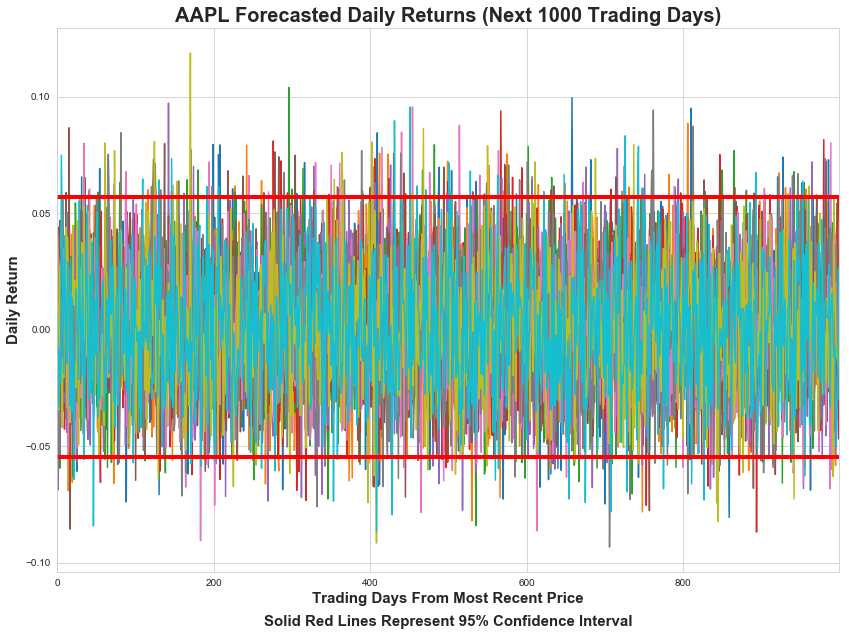

In [66]:
plt.plot(daily_returns)
plt.title('AAPL Forecasted Daily Returns (Next 1000 Trading Days)', fontsize = 20, weight = 'bold')
plt.xlabel('Trading Days From Most Recent Price', fontsize = 15, weight = 'bold')
plt.ylabel('Daily Return', fontsize = 15, weight = 'bold')
plt.axhline(y = daily_returns.mean() + 2*daily_returns.std(), color = 'r', linewidth = 4)
plt.axhline(y = daily_returns.mean() - 2*daily_returns.std(), color = 'r', linewidth = 4)
plt.figtext(0.33, 0.05, 'Solid Red Lines Represent 95% Confidence Interval', fontsize = 15, weight = 'bold')
fig = plt.gcf()
fig.set_size_inches(14,10)
plt.margins(x = 0)
plt.show()

In [28]:
s_t = data.iloc[-1]                                 #Obtaining most recent stock price
s_t

139.79176299999997

In [29]:
price_list = np.zeros_like(daily_rets)              #Creates empty list to the dimension of 'daily_rets'
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
price_list[0] = s_t                                 #First element of predicted stock prices is most recent stock price
price_list

array([[139.791763, 139.791763, 139.791763, ..., 139.791763, 139.791763,
        139.791763],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [31]:
for t in range(1, intervals):
    price_list[t] = price_list[t-1] * daily_rets[t]

In [32]:
price_list

array([[139.791763  , 139.791763  , 139.791763  , ..., 139.791763  ,
        139.791763  , 139.791763  ],
       [141.44806073, 139.18034346, 137.89947879, ..., 139.22972898,
        138.26070603, 138.42738909],
       [147.66859445, 141.99905893, 139.66713326, ..., 131.85995366,
        133.51051738, 133.76211042],
       ...,
       [828.329682  , 918.53681275, 364.95289061, ..., 368.70384862,
         95.17697899, 211.97040056],
       [824.76884988, 918.9832    , 374.4552223 , ..., 357.68869022,
         93.65975163, 208.71359964],
       [842.35351398, 904.46584385, 384.41387462, ..., 352.86589304,
         94.74517718, 214.33523844]])

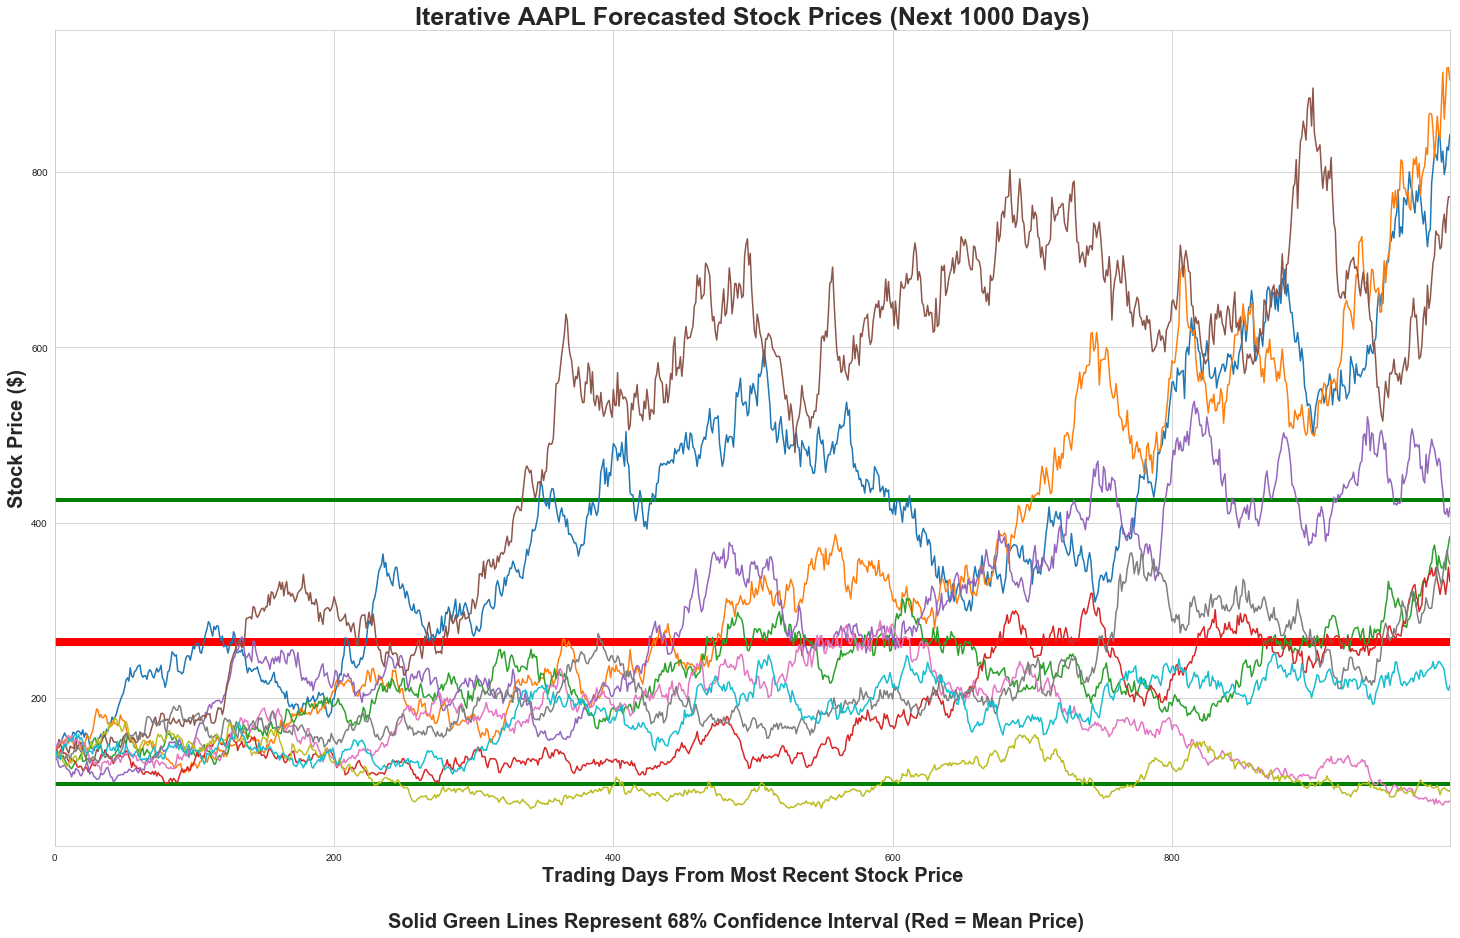

In [54]:
plt.figure(figsize = (25,15))
plt.title('Iterative AAPL Forecasted Stock Prices (Next 1000 Days)', fontsize = 25, weight = 'bold')
plt.xlabel('Trading Days From Most Recent Stock Price', fontsize = 20, weight = 'bold')
plt.ylabel('Stock Price ($)', fontsize = 20, weight = 'bold')
plt.axhline(y = price_list.mean(), color = 'r', linewidth = 8)
plt.axhline(y = price_list.mean() + price_list.std(), color = 'g', linewidth = 4)
plt.axhline(y = price_list.mean() - price_list.std(), color = 'g', linewidth = 4)
plt.plot(price_list)
plt.figtext(0.31, 0.05, 'Solid Green Lines Represent 68% Confidence Interval (Red = Mean Price)', fontsize = 20, 
            weight = 'bold' )
plt.margins(x = 0)
plt.show()

In [56]:
round(price_list.mean(), 2)

263.99

In [57]:
round(price_list.std(), 2)

162.11

In [59]:
price_list[999]

array([842.35351398, 904.46584385, 384.41387462, 332.7724949 ,
       416.9463772 , 771.66068275,  83.03661376, 352.86589304,
        94.74517718, 214.33523844])